### Aim of the project:

The aim of the project is to classify whether a person is suffering from a heart disease or not using the machine learning classifier algorithms. We have also used regression techniques to find out which factors effect the cause of heart attacks the most.

### Description of dataset

We used the Heart Disease dataset from Kaggle for our project. Our data set has 14 columns and 303 rows.

Age: Age of the patient

Sex: Sex of the patient

cp: Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal pain, 3 = Asymptomatic

trtbps: Resting blood pressure (in mm Hg)

chol: Cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg: Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh: Maximum heart rate achieved

oldpeak: Previous peak

slp: Slope

caa: Number of major vessels

thall: Thalium Stress Test result ~ (0,3)

exng: Exercise induced angina ~ 1 = Yes, 0 = No

output: Target variable



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset

df= pd.read_csv("heart.csv")
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Data Preprocessing

In [5]:
#Separating the columns into categorical and continous

cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [6]:
df_corr = df[con_cols].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


In [7]:
#Null values

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Exploratory Data Analysis

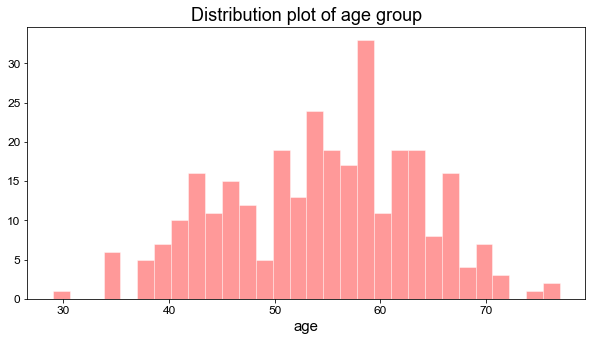

In [9]:
fig = plt.figure(figsize=(10,5))
plt.title("Distribution plot of age group", fontsize=18)
sns.set_style('whitegrid')
sns.distplot(df['age'], kde=False, color='red', bins=30)
plt.xlabel("age", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We have used distribution plot to find the age group which is prone to higher risks of heart attack. It
showed that people belonging to the age group of 52 to 58 are more prone to heart disease

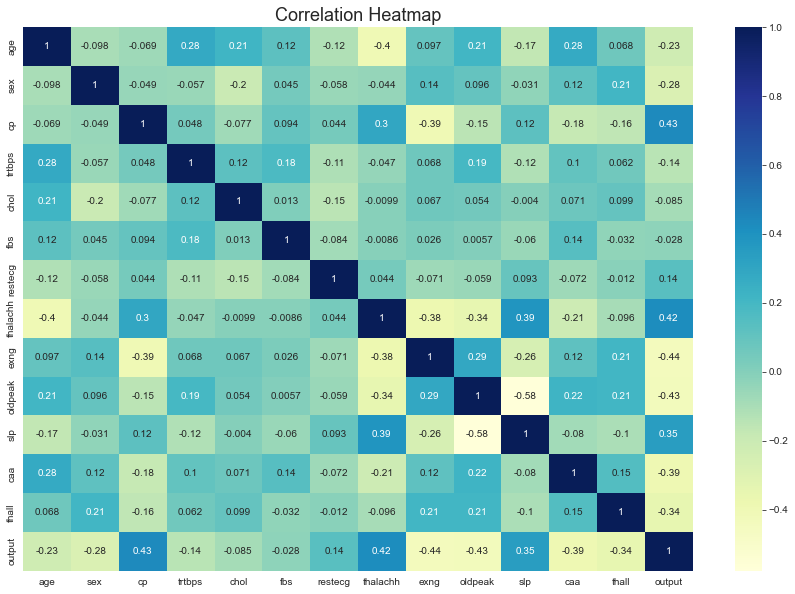

In [10]:
corrmat = df.corr()
corr_features = corrmat.index
plt.figure(figsize=(15,10))
plt.title('Correlation Heatmap', fontsize=18)
y=sns.heatmap(df[corr_features].corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:title={'center':'Heart Attack according to sex'}, xlabel='sex', ylabel='count'>

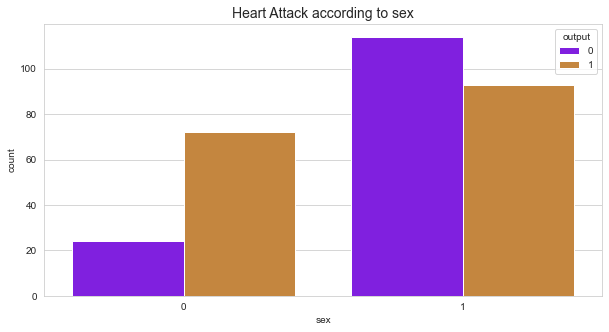

In [11]:
fig = plt.figure(figsize=(10,5))
plt.title("Heart Attack according to sex", fontsize=14)
sns.countplot(data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')

We used count plot to find number of males and females prone to heart attack. From the count plot,
we observed that females are more prone to heart diseases than male. Out of all the females, about 22
of them are not prone to heart disease whereas about 75 people are prone to heart disease. Similarly,
more than 110 males are not prone to heart disease which is more than the count of male that are
prone to heart disease.

Text(0, 0.5, 'age')

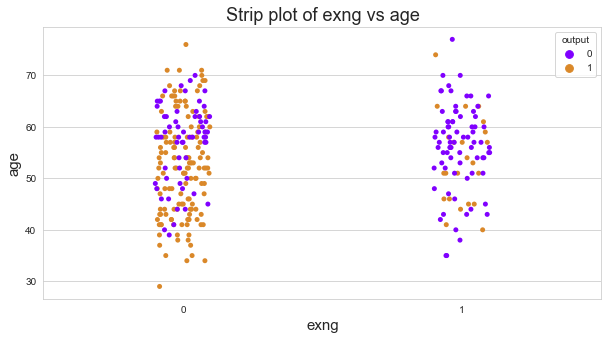

In [12]:
fig = plt.figure(figsize=(10,5))
plt.title("Strip plot of exng vs age", fontsize=18)
sns.stripplot(data=df,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
plt.xlabel('exng', fontsize=15)
plt.ylabel('age', fontsize=15)

From this plot, it is observed that most of the people are not effected with exercise induced angina. Among the effected ones, most of them are from the age group of 50-70 and it is observed that they are less prone to heart attacks. We can infer that age and exng as an interaction term is not a suitable factor.

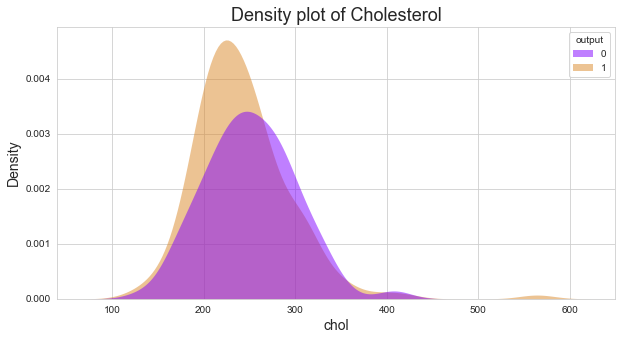

In [13]:
plt.figure(figsize=(10,5))
plt.title("Density plot of Cholesterol", fontsize=18)
sns.kdeplot(data=df, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
plt.xlabel('chol', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

The density plot above shows that people with cholesterol are more prone to heart attacks as it can be seen from the peak of the graph.

<AxesSubplot:title={'center':'Different types of chest pain'}>

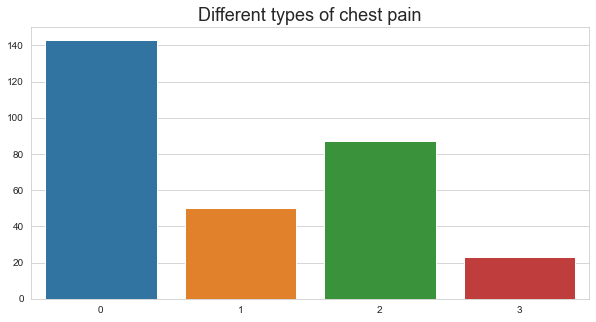

In [14]:
fig = plt.figure(figsize=(10,5))
cp=df['cp'].value_counts()
plt.title('Different types of chest pain', fontsize=18)
sns.barplot(x=cp.index,y=cp.values)

We plotted a bar plot to show how many people are suffering with different types of chest pains. We
found that many participants have typical angina kind of chest pain, and very few participants have
Asymptotic kind of chest pain

<Figure size 720x720 with 0 Axes>

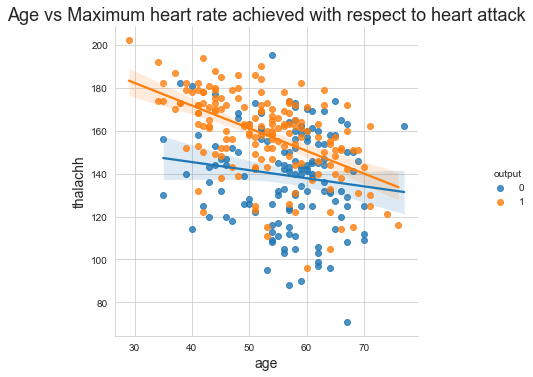

In [15]:
figure = plt.figure(figsize=(10,10))
sns.lmplot(x='age',y='thalachh',hue='output',data=df)
plt.title('Age vs Maximum heart rate achieved with respect to heart attack',size=18)
plt.xlabel('age', fontsize=14)
plt.ylabel('thalachh', fontsize=14)
plt.show()

From the graph, people between the age group of 50-60 with highest thalachh i.e,the maximum heart rate achieved have higher chances of heart attack

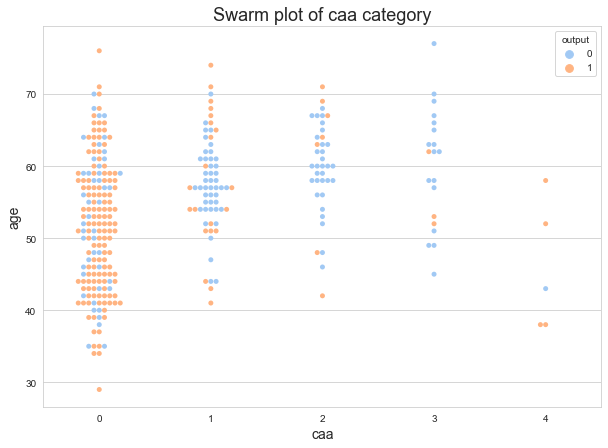

In [16]:
figure = plt.figure(figsize=(10,7))
plt.title('Swarm plot of caa category', fontsize=18)
plt.xlabel('caa', fontsize=14)
plt.ylabel('age', fontsize=14)
sns.swarmplot(x=df['caa'], y=df['age'], hue=df['output'], palette='pastel')
plt.show()

From the graph, it is observed that if number of major blood vessels is 0, then people are prone to heart attacks from the age group of 40-60

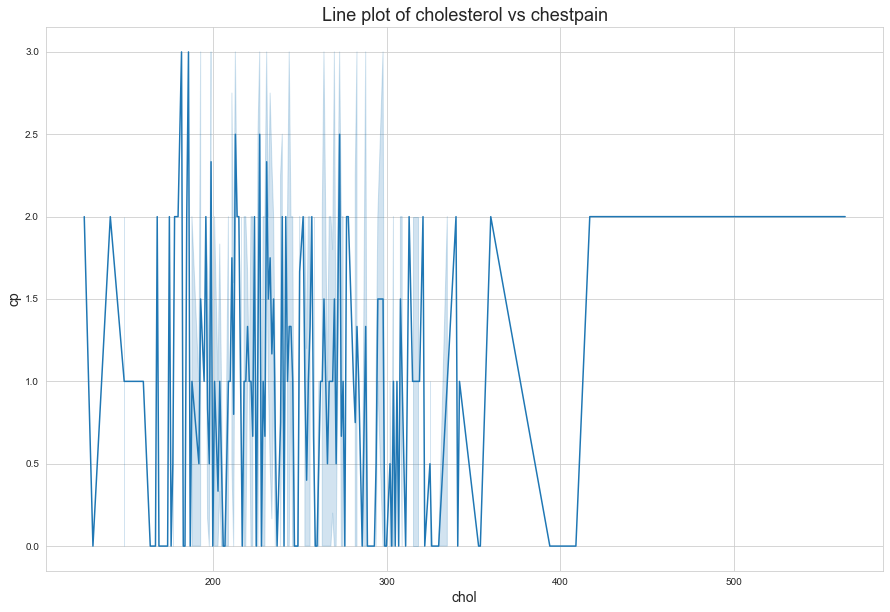

In [17]:
figure = plt.figure(figsize=(15,10))
plt.title("Line plot of cholesterol vs chestpain", fontsize=18)
plt.xlabel('chol', fontsize=14)
plt.ylabel('cp', fontsize=14)
sns.lineplot(data=df, x=df['chol'], y=df['cp'])
plt.show()

Line plot is plotted between cholesterol and chest pain to notice how the levels of cholesterol affects
the chest pain in a person. It is observed that in people with cholesterol level above 420, the chest pain
remains the same kind i.e; Non-anginal pain

### Test and train split

We divide the data into a test set and a train set after preprocessing. We often separate the data we utilize into training data and test data. The test dataset is used to verify our model's prediction whereas the training set provides a known output from which the model learns. We carried out this using Python's SciKit-Learn package and the train test split technique.
In this project, 75% of the total data is used for training, while 25% is used for testing

In [18]:
X = df.iloc[:, 0:13].values 
y = df.iloc[:, -1].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 13)
The shape of X_test is        (61, 13)
The shape of y_train is       (242,)
The shape of y_test is        (61,)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(X_train)
Xtest = sc.transform(X_test)

### Model Building

### Classification algorithms

In [21]:
def model_predict(model, X_train, X_test, y_train, y_test):
    model = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model.score(X_test, y_test)
       
tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)  
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)  
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

acc_tree = model_predict(tree, X_train, X_test, y_train, y_test)
acc_rf = model_predict(rf, X_train, X_test, y_train, y_test)
acc_svm = model_predict(clf, X_train, X_test, y_train, y_test)

print("Accuracy of svm: ", round(acc_svm,5))
print("Accuracy of Decision Tree classifier: ", round(acc_tree,5))
print("Accuracy of Random Forest: ", round(acc_rf,5))

Accuracy of svm:  0.86885
Accuracy of Decision Tree classifier:  0.81967
Accuracy of Random Forest:  0.85246


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred_proba = logistic_reg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)

print("The accuracy score of Logistic Regression is ", accuracy_score(y_test, y_pred))

The accuracy score of Logistic Regression is  0.8852459016393442


Out of all the benchmark classifiers we have implemented, it can be seen that Logistic Regression algorithm gives the best results.

#### MULTIPLE REGRESSION

##### Model 1

In [23]:
import statsmodels.formula.api as sm
result1 = sm.ols(formula = "output ~ age+sex+cp+trtbps+chol+fbs+restecg+thalachh+exng+oldpeak+slp+caa+thall", data = df).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.49e-38
Time:                        22:05:09   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8289      0.293      2.830      0.0

In [24]:
MSE1 = result1.ssr/len(df)
print("MSE : ", MSE1)

MSE :  0.11965479756916172


In [25]:
R_squared1 = result1.rsquared
print("R2 : ", R_squared1)

R2 :  0.5175499644256842


In [26]:
import statsmodels.formula.api as sm
res = sm.ols(formula = "output ~ age", data = df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     16.12
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           7.52e-05
Time:                        22:05:09   Log-Likelihood:                -210.80
No. Observations:                 303   AIC:                             425.6
Df Residuals:                     301   BIC:                             433.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2177      0.170      7.163      0.0

In [27]:
import statsmodels.formula.api as sm
res = sm.ols(formula = "output ~ chol", data = df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.203
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.139
Time:                        22:05:09   Log-Likelihood:                -217.60
No. Observations:                 303   AIC:                             439.2
Df Residuals:                     301   BIC:                             446.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7466      0.139      5.368      0.0

We have applied regression analysis for 13 variables. The variables having p-value less than 0.05 are considered to have significant effect with the target variable.

From the above metrics we can draw the significant factors effecting heart diseases:
{sex, cp, thalachh, exng, oldpeak, caa, thall}

##### Model 2

In [28]:
import statsmodels.formula.api as sm
result2 = sm.ols(formula = "output ~ sex+cp+thalachh+exng+oldpeak+caa+thall", data = df).fit()
print(result2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     42.17
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           5.58e-41
Time:                        22:05:09   Log-Likelihood:                -113.65
No. Observations:                 303   AIC:                             243.3
Df Residuals:                     295   BIC:                             273.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5365      0.180      2.977      0.0

When the low significance factors were removed, the R2 value dropped from 51.8 to 50%. This can be the result of missing interaction terms. That is to say, age need not be a factor in developing heart disease, although older persons with high cholesterol levels may have a higher risk than younger people with high cholesterol. Checking for all the interaction terms is highly impossible because there are 13C2 combinations. Hence we consider the interactions with higher correlation values.

From the above heatmap, the factors age and trtbps have higher correlation values. So, these interaction terms are included. 

In [29]:
MSE2 = result2.ssr/len(df)
print("MSE : ", MSE2)

MSE :  0.12396957913380283


In [30]:
R_squared2 = result2.rsquared
print("R2 : ", R_squared2)

R2 :  0.500152696939161


#### For interaction between "Thalachh" and "Age"

In [31]:
import statsmodels.formula.api as sm
res = sm.ols(formula = "output ~ age+sex+cp+thalachh+exng+oldpeak+caa+thall+trtbps+age*thalachh", data = df).fit()
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     30.92
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           2.37e-40
Time:                        22:05:09   Log-Likelihood:                -109.30
No. Observations:                 303   AIC:                             240.6
Df Residuals:                     292   BIC:                             281.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.8561      0.885     -0.968   

The R squared value is increased, also the interaction terms p-value is less than 0.05. Hence these interaction terms can be included

#### For interaction between "Trtbps" and "Age"

In [32]:
import statsmodels.formula.api as sm
res = sm.ols(formula = "output ~ age+sex+cp+thalachh+exng+oldpeak+caa+thall+trtbps+age*trtbps", data = df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     30.26
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.13e-39
Time:                        22:05:09   Log-Likelihood:                -110.97
No. Observations:                 303   AIC:                             243.9
Df Residuals:                     292   BIC:                             284.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2597      1.113     -0.233      0.8

Here the p-values are greater but the R squared value is increased. So, this term can be included

#### For the interaction between "Trtbps" and "Cp"

In [33]:
import statsmodels.formula.api as sm
res = sm.ols(formula = "output ~ age+sex+cp+thalachh+exng+oldpeak+caa+thall+trtbps+cp*trtbps", data = df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     30.05
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.88e-39
Time:                        22:05:09   Log-Likelihood:                -111.51
No. Observations:                 303   AIC:                             245.0
Df Residuals:                     292   BIC:                             285.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9607      0.325      2.957      0.0

The p-values are higher than 0.05 and also no significant improvement in R squared value. Hence, this term cannot be included.

#### For the interaction between "cp" and "Thalachh"

In [34]:
import statsmodels.formula.api as sm
res = sm.ols(formula = "output ~ age+sex+cp+thalachh+exng+oldpeak+caa+thall+trtbps+cp*thalachh", data = df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     30.12
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.59e-39
Time:                        22:05:09   Log-Likelihood:                -111.33
No. Observations:                 303   AIC:                             244.7
Df Residuals:                     292   BIC:                             285.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9700      0.298      3.258      

Interaction term P values is greater than 0.05, so this interaction is not significant, but R squared value has improvement, it is suggested to include this term


#### For the interaction between "Exng" and "cp"

In [35]:
import statsmodels.formula.api as sm
res = sm.ols(formula = "output ~ age+sex+cp+thalachh+exng+oldpeak+caa+thall+trtbps+cp*thalachh", data = df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     30.12
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.59e-39
Time:                        22:05:09   Log-Likelihood:                -111.33
No. Observations:                 303   AIC:                             244.7
Df Residuals:                     292   BIC:                             285.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9700      0.298      3.258      

Interaction term P values is greater than 0.05, so this interaction is not significant, but R^2 has improvement, it is suggested to include this term

##### The final model:

In [36]:
import statsmodels.formula.api as sm
result3 = sm.ols(formula = "output ~age+sex+cp+thalachh+exng+oldpeak+caa+thall+trtbps+thalachh*age+trtbps*age+exng*cp+thalachh*cp", data = df).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     24.09
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           7.23e-39
Time:                        22:05:09   Log-Likelihood:                -107.49
No. Observations:                 303   AIC:                             243.0
Df Residuals:                     289   BIC:                             295.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.6242      1.387     -1.171   

In [37]:
MSE3 = result3.ssr/len(df)
print("MSE : ", MSE3)

MSE :  0.11903423799514083


In [38]:
R_squared3 = result3.rsquared
print("R2 : ", R_squared3)

R2 :  0.520052070439355


### Conclusion:

As we can see, the R squared value has increased to 52% in the final model. Hence the terms and their interactions included in the building of model are responsible for the cause of heart attacks.